In [1]:
import shap
import joblib
import pandas as pd

In [2]:
# Load model
model = joblib.load("../models/disease_prediction_model.pkl")

# Load feature data
X = pd.read_csv("../data/X_processed.csv")

In [3]:
# SHAP expects tree-based explainer for Random Forest
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X)


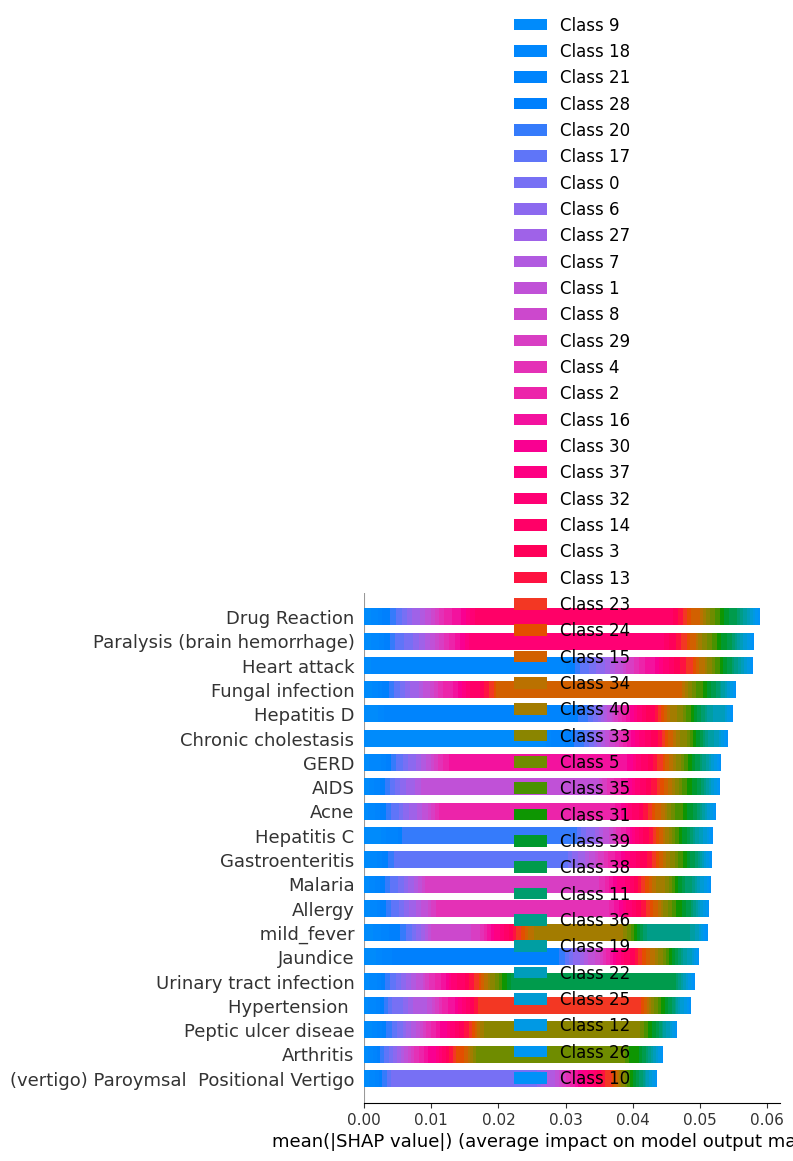

In [4]:
shap.summary_plot(shap_values, X, plot_type="bar")


In [10]:
sample_index = 0
sample_df = X.iloc[[sample_index]]      # 1-row DataFrame
sample_values = X.iloc[sample_index]    # 1D Series (for feature values)
sample_array = sample_values.values     # 1D NumPy array

# Get prediction for this sample
pred_class = model.predict(sample_df)[0]

# Get the correct SHAP values for predicted class
shap_values_pred = shap_values[sample_index, :, pred_class]

# Plot
shap.initjs()
shap.force_plot(
    explainer.expected_value[pred_class],  # base value for predicted class
    shap_values_pred,                      # SHAP values for predicted class
    sample_array,                          # actual feature values
    feature_names=X.columns
)